In [15]:
%env OMP_NUM_THREADS=1
%env NUMEXPR_MAX_THREADS=1

import numpy as np
import matplotlib.pyplot as plt
import dedalus.public as d3
import logging
logger = logging.getLogger(__name__)
import xarray as xr

from mydedalustools import *    
import h5py

%load_ext autoreload
%autoreload 2

env: OMP_NUM_THREADS=1
env: NUMEXPR_MAX_THREADS=1
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
meter = 1 / 6.37122e6
hour = 1
second = hour / 3600
day = hour*24
Kelvin = 1

In [24]:
snapshots_2level_test  = open_h5('snapshots_2level_T21_locked_10_p02_200_p05','s1')
snapshots_N10level_test  = concat_levels(open_h5s_wgauge('snapshots_N10level_T21_locked_10_p02_200_p05',('s1','s2')),10)


Text(0.5, 1.0, '$[u_1]$ and $[u_2]$ at the equator vs time')

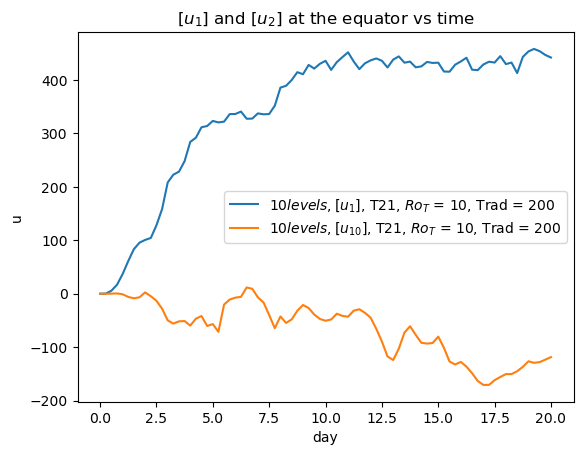

In [101]:
def zonalmeanu1_eq(u):
    return u[:,0].sel(latitude=0,method='nearest').mean(('longitude'))/(meter/second)

zonalmeanu1_eq(snapshots_N10level_test.u[..., 0]).plot(x='day',label=r'$10 levels, [u_1]$, T21, $Ro_T$ = 10, Trad = 200')
zonalmeanu1_eq(snapshots_N10level_test.u[...,-1]).plot(x='day',label=r'$10 levels, [u_{10}]$, T21, $Ro_T$ = 10, Trad = 200')

plt.legend()
plt.title(r'$[u_1]$ and $[u_2]$ at the equator vs time')
#plt.xlim(0,10)

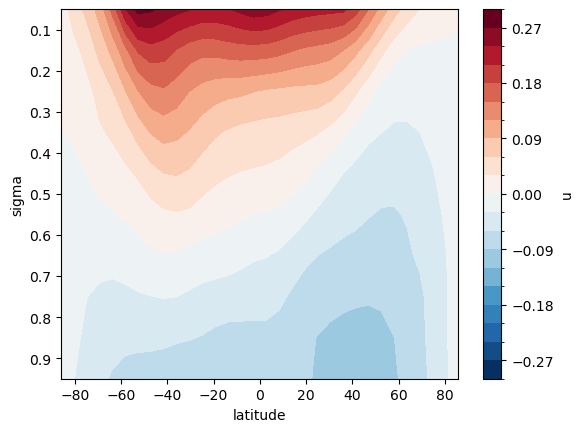

In [109]:
snapshots_N10level_test.u[-4:,0].mean(('t','longitude')).plot.contourf(levels=20,y='sigma',yincrease=False)

In [7]:
def finalmean(u):
    return u[-4:].mean(('t'))/(meter/second)
def finalmeant(u):
    return u[-4:].mean(('t'))/(Kelvin)

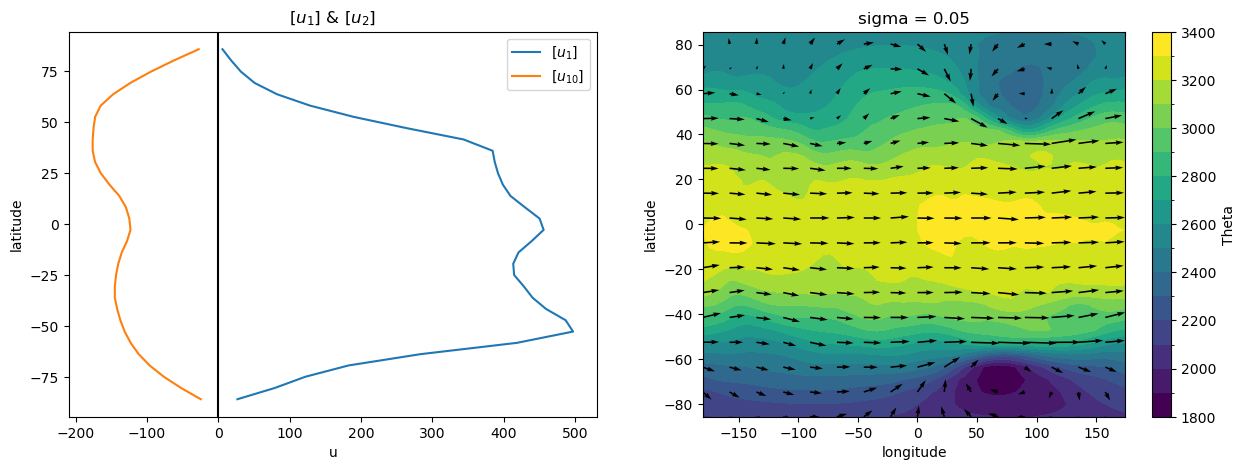

In [114]:

_,axs = plt.subplots(1,2,figsize=(15,5))
finalmean(snapshots_N10level_test.u[:,0,...,0]).mean('longitude').plot(ax=axs[0],y='latitude',label=r'$[u_1]$')
finalmean(snapshots_N10level_test.u[:,0,...,-1]).mean('longitude').plot(ax=axs[0],y='latitude',label=r'$[u_{10}]$')
axs[0].axvline(0.,color='k')
axs[0].legend()
axs[0].set_title(r'$[u_1]$ & $[u_2]$')

plot_one_theta_wind(axs[1],finalmeant(snapshots_N10level_test.Theta[...,0]),finalmean(snapshots_N10level_test.u[...,0]),vmin=None,vmax=None,wind_disc=2)


# Axisymmetric 5-level run

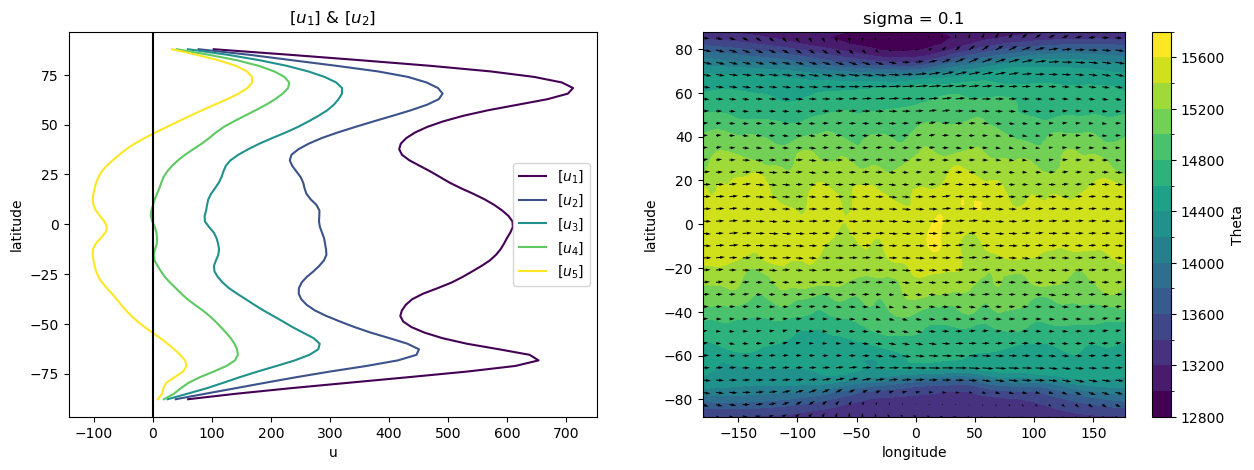

In [12]:

_,axs = plt.subplots(1,2,figsize=(15,5))
colors = plt.cm.viridis(np.linspace(0,1,5))
for i in range(5):
    finalmean(snapshots_N5level_nolock.u[:,0,...,i]).mean('longitude').plot(ax=axs[0],y='latitude',label=r'$[u_%i]$'%(i+1),color=colors[i])
axs[0].axvline(0.,color='k')
axs[0].legend()
axs[0].set_title(r'$[u_1]$ & $[u_2]$')

plot_one_theta_wind(axs[1],finalmeant(snapshots_N5level_nolock.Theta[...,0]),finalmean(snapshots_N5level_nolock.u[...,0]),vmin=None,vmax=None,wind_disc=2)


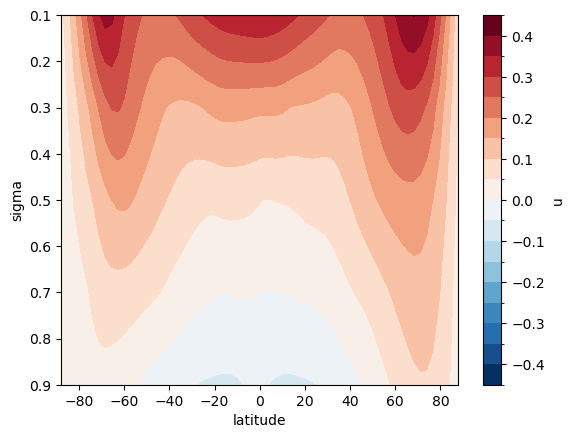

In [9]:
snapshots_N5level_nolock.u[-4:,0].mean(('t','longitude')).plot.contourf(levels=20,y='sigma',yincrease=False)